<a href="https://colab.research.google.com/github/jpdicarvalho/Modelos-Estatisticos-Preditivos/blob/main/Regress%C3%A3o_Linear_Previs%C3%A3o_para_o_ano_de_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

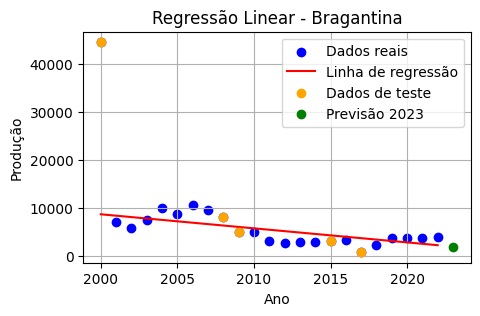

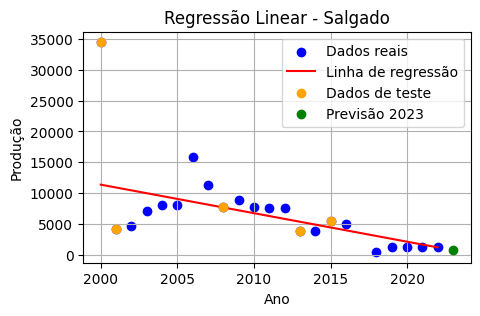

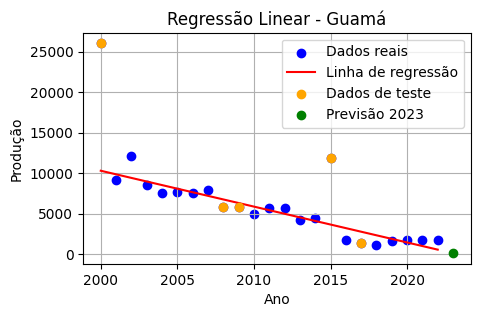

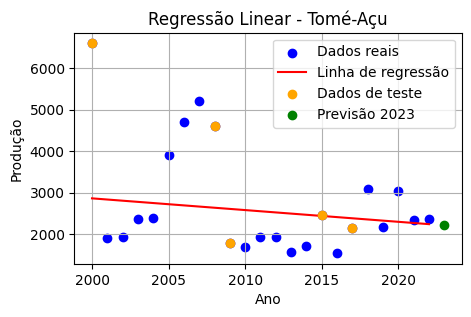

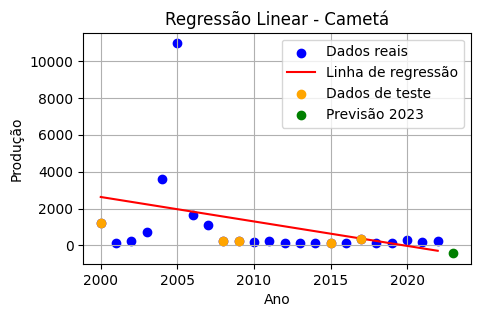

       Região     Intercepto  Coeficiente  R² Treino  R² Teste          MAE  \
0  Bragantina  594203.960356  -292.802184   0.528881  0.021671  8557.423867   
1     Salgado  935810.022545  -462.214871   0.544787  0.156747  6480.330776   
2       Guamá  896828.721683  -443.269417   0.905232  0.140604  5359.553560   
3    Tomé-Açu   59457.958198   -28.296521   0.033848 -0.113703  1359.838862   
4      Cametá  267832.705502  -132.601942   0.125660 -6.279326   896.722977   

            MSE          RMSE  Produção Estimada em 2023  
0  2.597524e+08  16116.835672                1865.141181  
1  1.161276e+08  10776.249943                 749.337924  
2  6.367921e+07   7979.925248                  94.690129  
3  3.721038e+06   1928.999312                2214.096143  
4  1.099736e+06   1048.683071                -421.022654  


,Região,Intercepto,Coeficiente,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2023
0,Bragantina,594203.960356,-292.802184,0.528881,0.021671,8557.423867,2.597524e+08,16116.835672,1865.141181
1,Salgado,935810.022545,-462.214871,0.544787,0.156747,6480.330776,1.161276e+08,10776.249943,749.337924
2,Guamá,896828.721683,-443.269417,0.905232,0.140604,5359.553560,6.367921e+07,7979.925248,94.690129
3,Tomé-Açu,59457.958198,-28.296521,0.033848,-0.113703,1359.838862,3.721038e+06,1928.999312,2214.096143
4,Cametá,267832.705502,-132.601942,0.125660,-6.279326,896.722977,1.099736e+06,1048.683071,-421.022654


In [1]:
# Recarregar as bibliotecas necessárias após a reinicialização do estado de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Recarregar os dados fornecidos para análise (Ajustado para previsão de 2023)
data = {
    "Year": list(range(2000, 2023)),  # Agora o intervalo é de 2000 a 2022
    "Bragantina": [44440, 7031, 5646, 7394, 9906, 8728, 10512, 9448, 8003, 4943, 4879, 3071, 2717, 2868, 2868, 2955, 3177, 695, 2163, 3600, 3581, 3669, 3803],
    "Salgado": [34464, 4254, 4724, 7114, 8102, 8071, 15875, 11323, 7807, 8931, 7766, 7672, 7672, 3828, 3828, 5433, 4926, None, 430, 1250, 1250, 1250, 1300],
    "Guamá": [26052, 9103, 12086, 8562, 7551, 7692, 7554, 7893, 5761, 5771, 4916, 5629, 5652, 4152, 4440, 11820, 1682, 1410, 1144, 1572, 1687, 1779, 1697],
    "Tomé-Açu": [6608, 1914, 1932, 2363, 2379, 3920, 4712, 5220, 4601, 1781, 1684, 1924, 1924, 1569, 1706, 2471, 1541, 2150, 3088, 2176, 3031, 2353, 2360],
    "Cametá": [1195, 132, 216, 705, 3600, 10969, 1634, 1114, 244, 244, 204, 254, 120, 120, 120, 120, 120, 360, 120, 120, 300, 200, 220]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para dividir os dados em treino e teste, treinar o modelo e avaliar desempenho
def train_and_evaluate_model_2023(data, regions):
    results = []

    for region in regions:
        region_data = np.array(data[region], dtype=float)  # Garantir tipo float

        # Remover valores nulos para treinamento
        valid_indices = ~np.isnan(region_data)
        years_valid = np.array(data["Year"])[valid_indices].reshape(-1, 1)
        values_valid = region_data[valid_indices]

        # Dividir os dados em treino (80%) e teste (20%)
        X_train, X_test, y_train, y_test = train_test_split(years_valid, values_valid, test_size=0.2, random_state=42)

        # Regressão linear
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Previsão para os dados de teste
        y_pred = model.predict(X_test)

        # Métricas de erro
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Previsão para 2023
        future_year = np.array([[2023]])
        future_prediction = model.predict(future_year)

        # Coeficientes do modelo
        intercept = model.intercept_
        coefficient = model.coef_[0]

        # Armazenar os resultados
        results.append({
            "Região": region,
            "Intercepto": intercept,
            "Coeficiente": coefficient,
            "R² Treino": model.score(X_train, y_train),
            "R² Teste": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Produção Estimada em 2023": future_prediction[0]
        })

        # Gráfico para a região
        plt.figure(figsize=(5, 3))
        plt.scatter(years_valid, values_valid, color="blue", label="Dados reais")
        plt.plot(years_valid, model.predict(years_valid.reshape(-1, 1)), color="red", label="Linha de regressão")
        plt.scatter(X_test, y_test, color="orange", label="Dados de teste", zorder=5)
        plt.scatter(2023, future_prediction, color="green", label="Previsão 2023", zorder=6)
        plt.title(f"Regressão Linear - {region}")
        plt.xlabel("Ano")
        plt.ylabel("Produção")
        plt.legend()
        plt.grid()
        plt.show()

    return pd.DataFrame(results)

# Lista de regiões para análise
regions = ["Bragantina", "Salgado", "Guamá", "Tomé-Açu", "Cametá"]

# Executar modelo com divisão entre treino e teste para previsão de 2023
results_2023 = train_and_evaluate_model_2023(data, regions)

# Exibir tabela com previsões e métricas
print(results_2023)

# Se estiver rodando no Jupyter Notebook ou Colab, use display() para melhor visualização
from IPython.display import display
display(results_2023)